## Basic plan on a page generator 
#### Generating a simple plan on a page by using ghant chart and taking the start and end date of tasks

In [4]:
#creating ghant chart for project plan. plotting a two week period
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

In [6]:
#create data
data = {
    'Task': [
     'task 1',
'task 2',
'task 3',
'task 4',
'task 5',
'task 6',
'task 7',
'task 8',
'task 9',
'task 10',
'task 11',
'task 12',
'task 13',
'task 14',

    ],
    'start': [
        '2023-08-14',
        '2023-08-18',
        '2023-08-12',
        '2023-08-12',
        '2023-08-14',
        '2023-08-16',
        '2023-08-16',
        '2023-08-15',
        '2023-08-17',
        '2023-08-12',
        '2023-08-12',
        '2023-08-17',
        '2023-08-17',
        '2023-08-17'
    ],
    'end': [
        '2023-08-16',
        '2023-08-22',
        '2023-08-14',
        '2023-08-14',
        '2023-08-16',
        '2023-08-18',
        '2023-08-18',
        '2023-08-18',
        '2023-08-25',
        '2023-08-14',
        '2023-08-14',
        '2023-08-25',
        '2023-08-25',
        '2023-08-25'
    ]
}


df = pd.DataFrame(data)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Task    14 non-null     object
 1   start   14 non-null     object
 2   end     14 non-null     object
dtypes: object(3)
memory usage: 468.0+ bytes


In [11]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df.dtypes


Task             object
start    datetime64[ns]
end      datetime64[ns]
dtype: object

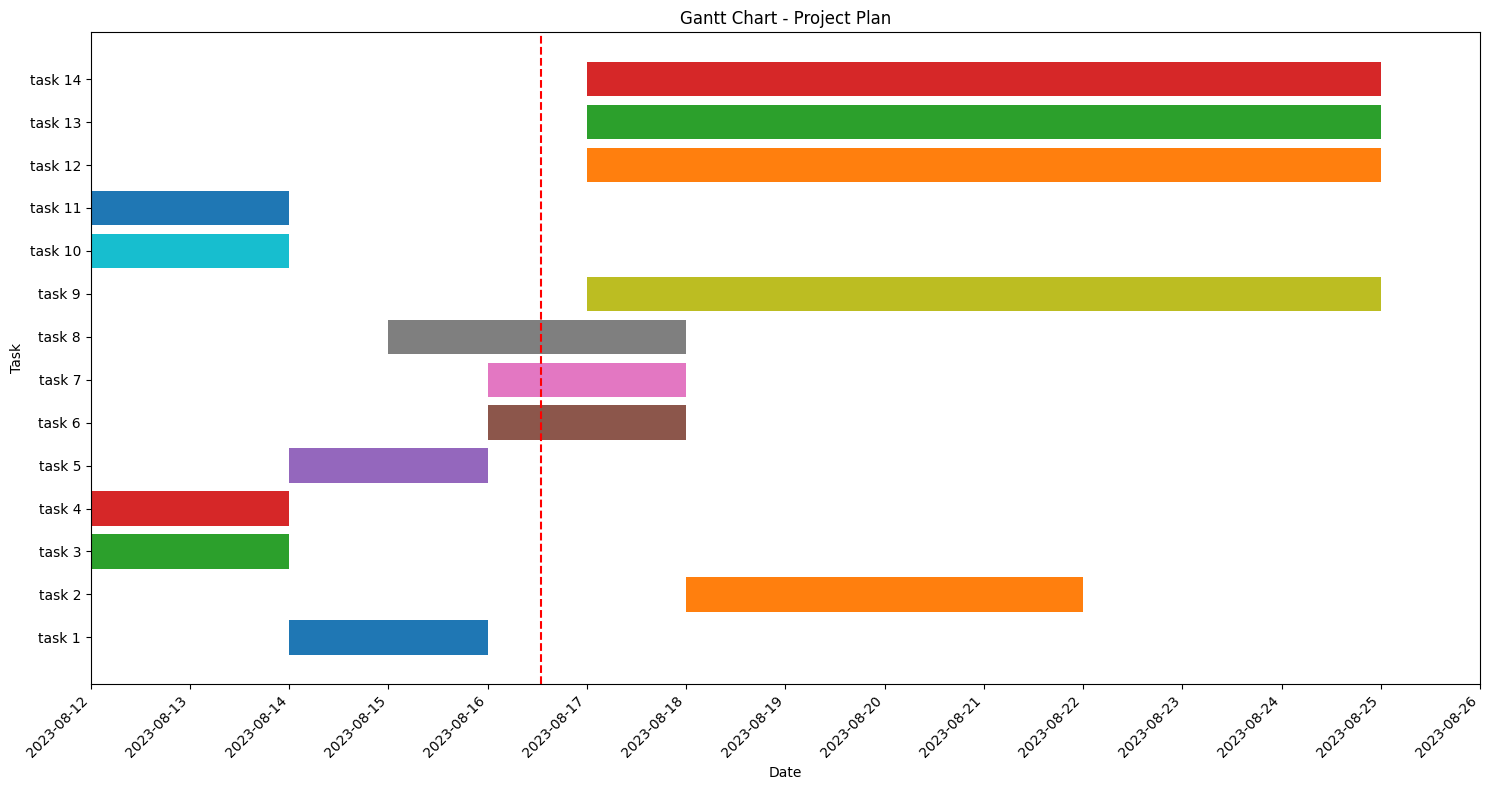

In [13]:
# Set up x-axis representing the two-week period
start_date = df['start'].min()
end_date = df['end'].max() + pd.DateOffset(days=1)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot tasks as horizontal bars
for index, row in df.iterrows():
    task_start = row['start']
    task_end = row['end']
    task_name = row['Task']
    ax.barh(task_name, width=(task_end - task_start), left=task_start)

# Set x-axis ticks and labels
ax.set_xticks(date_range)
ax.set_xticklabels(date_range.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Task')
ax.set_title('Gantt Chart - Project Plan')

# Calculate today's date
today = dt.datetime.today()

# Add a vertical line to indicate today's date
ax.axvline(x=today, color='red', linestyle='--', label="Today's Date")

# Show the Gantt chart
plt.tight_layout()
plt.show()

In [ ]:
df

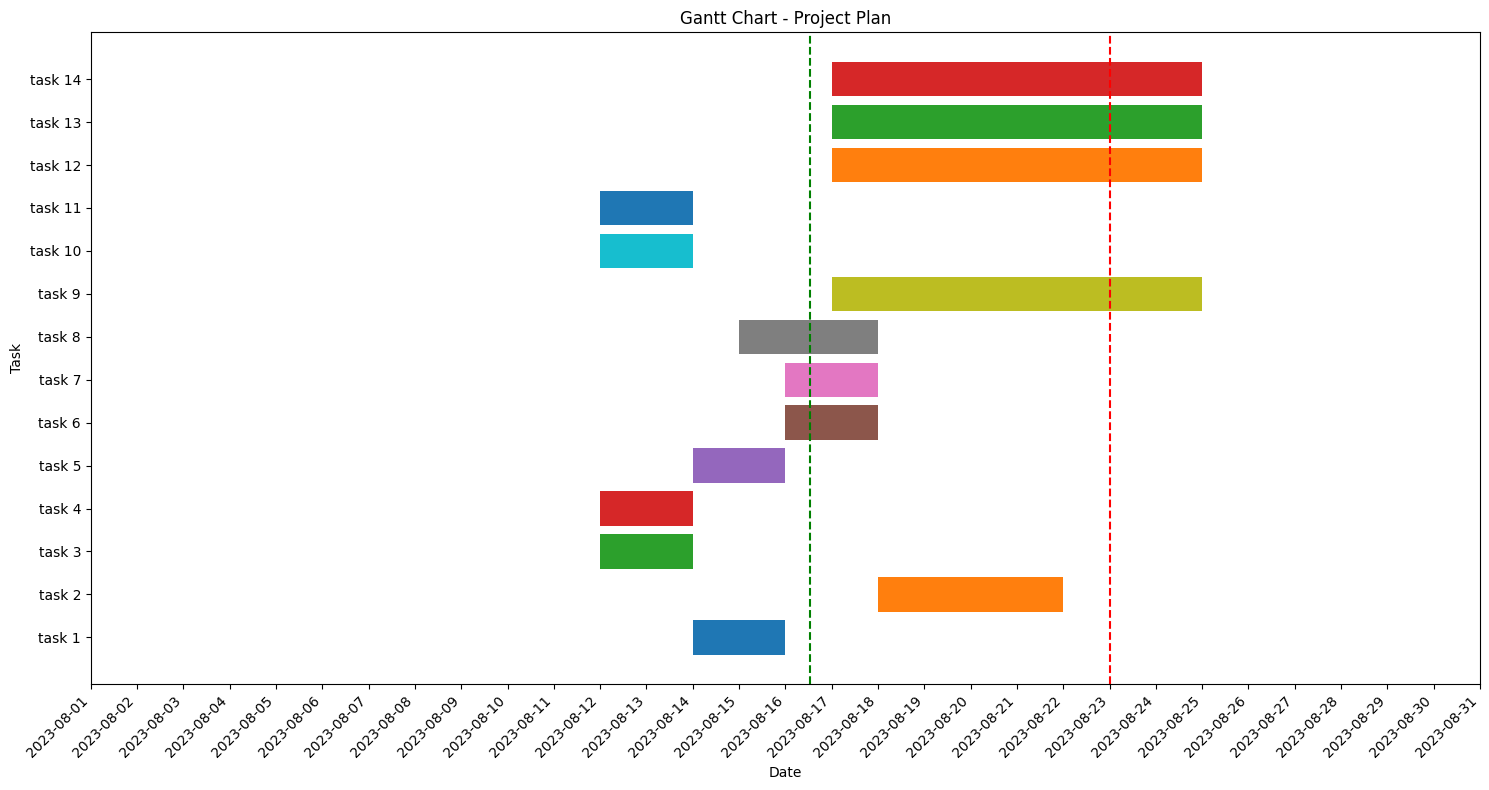

In [14]:
# Set up x-axis a month period

from datetime import datetime, timedelta
start_date = datetime(2023, 8, 1)
end_date = datetime(2023, 8, 31)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot tasks as horizontal bars
for index, row in df.iterrows():
    task_start = row['start']
    task_end = row['end']
    task_name = row['Task']
    ax.barh(task_name, width=(task_end - task_start), left=task_start)

# Set x-axis ticks and labels
ax.set_xticks(date_range)
ax.set_xticklabels(date_range.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.set_xlabel('Date')
ax.set_ylabel('Task')
ax.set_title('Gantt Chart - Project Plan')

# Calculate today's date
today = dt.datetime.today()

# Add a vertical line to indicate today's date
ax.axvline(x=today, color='green', linestyle='--', label="Today's Date")

# add a vertical line to indicate go live
go_live = datetime(2023, 8, 23)

# Add a vertical line to indicate today's date
ax.axvline(x=go_live, color='red', linestyle='--', label="expected go live date")

# Show the Gantt chart
plt.tight_layout()
plt.show()